# FAQ

**TRAINING, TESTING, AND "TRUE SURVIVAL" DATA IS DOWNLOADABLE FORM KAGGLE.**

-  Download from the link below and keep the name:
https://www.kaggle.com/c/titanic/data

- "True Survival Data" is from this (rename the file to "idkiftrue_submission.csv"):
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/output

- Upload to files

## THIS WAS DONE THROUGH GOOGLE COLAB
I don't know if it **is** Google Colab but...

Google Colab has this weird issue where if you run the ML models on different days, the values change by a small margin. Many of the stuff I had written led to different results compared to when I am going through it again (5/12/24) to make sure the work is accurate. Please excuse the work if there are any inconsistencies. I apologize in advanced.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

print(df.head())
print("\n============================\n")
print(df.describe())

# mapping values in the 'Embarked' column to numerical values
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# mapping values in the 'Sex' column to numerical values
sex_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

# verifying changes
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [ ]:
# create a new column 'family_size' by combining 'SibSp' and 'Parch'
# they're both family stats, so i thought that i should combine them to simplify the calculations
df['family_size'] = df['SibSp'] + df['Parch']

# thereby droppinig the 'SibSp' and 'Parch' columns
df = df.drop(['SibSp', 'Parch'], axis=1)

# verifying changes
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  \
0                            Braund, Mr. Owen Harris    0  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
2                             Heikkinen, Miss. Laina    1  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
4                           Allen, Mr. William Henry    0  35.0   

             Ticket     Fare Cabin  Embarked  family_size  
0         A/5 21171   7.2500   NaN       3.0            1  
1          PC 17599  71.2833   C85       1.0            1  
2  STON/O2. 3101282   7.9250   NaN       3.0            0  
3            113803  53.1000  C123       3.0            1  
4            373450   8.0500   NaN       3.0            0  



Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64


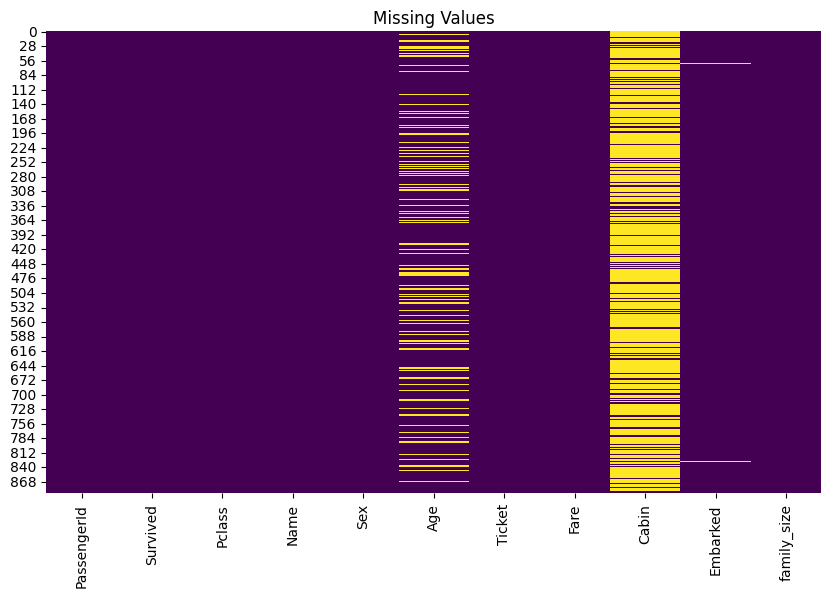

In [ ]:
# checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

In [ ]:
# regarding the missing Cabin values
# i feel that it isn't necessary to impute them with values

# however, with Age, i would like to impute them with the median age values

# impute missing values in the 'Age' column with the median age
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# verify that there are no more missing values in the 'Age' column
print("Missing Values in Age Column After Imputation:", df['Age'].isnull().sum(), "\n")

print(df.head())
print("\n============================\n")
print(df.describe())

# looking at the describe call, the imputation doesn't change the previous
# statistic too drastically

# we can move on

Missing Values in Age Column After Imputation: 0 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  \
0                            Braund, Mr. Owen Harris    0  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
2                             Heikkinen, Miss. Laina    1  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
4                           Allen, Mr. William Henry    0  35.0   

             Ticket     Fare Cabin  Embarked  family_size  
0         A/5 21171   7.2500   NaN       3.0            1  
1          PC 17599  71.2833   C85       1.0            1  
2  STON/O2. 3101282   7.9250   NaN       3.0            0  
3            113803  53.1000  C123       3.0            1  
4            373450   8.0500 

In [ ]:
# dealing with outliers
# define function to detect outliers using IQR method for each numerical feature
def detect_outliers(df, features):
    outlier_indices = {}

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices[col] = len(outlier_list_col)

    return outlier_indices

# detect outliers in numerical features
numerical_features = ['Age','Fare']
outliers_counts = detect_outliers(df, numerical_features)

print("Number of outliers for each numerical feature:")
for feature, count in outliers_counts.items():
    print(f"{feature}: {count}")


Number of outliers for each numerical feature:
Age: 66
Fare: 116


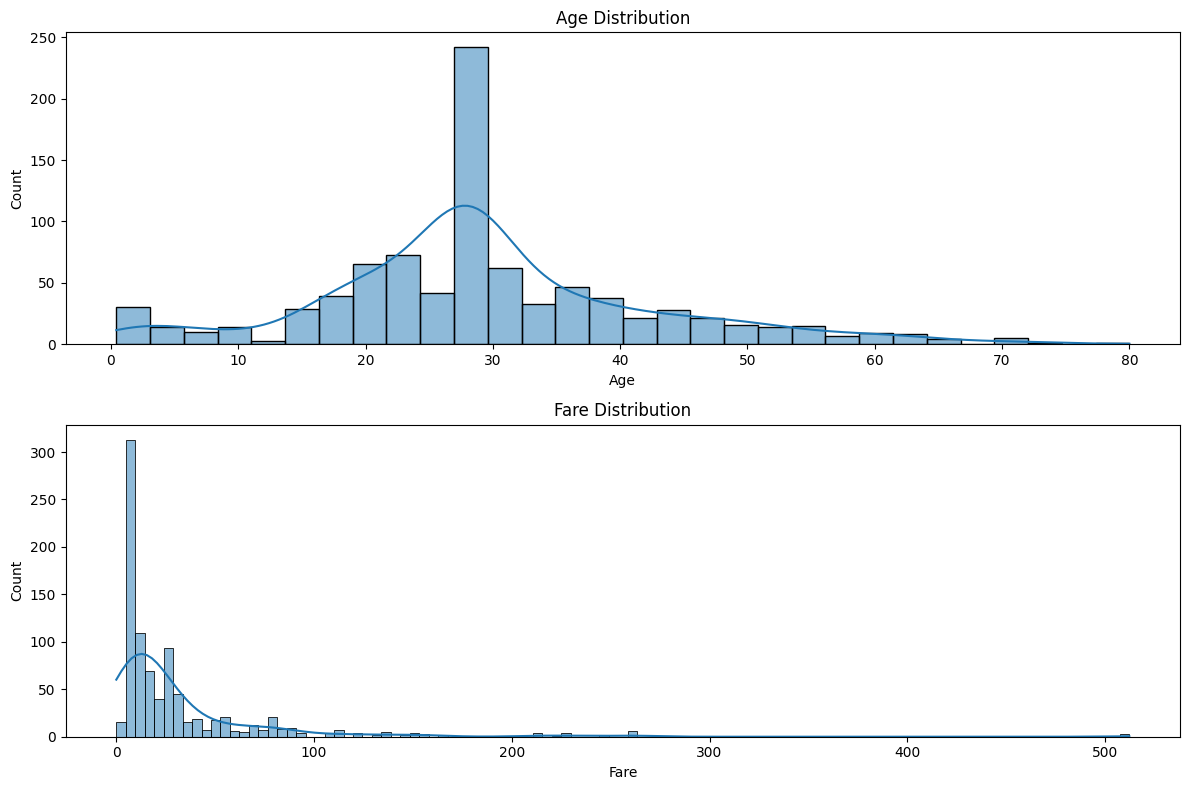

In [ ]:
plt.figure(figsize=(12, 8))

# plot age
plt.subplot(2, 1, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

# plot fare
plt.subplot(2, 1, 2)
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# sort the dataset by 'Fare' column in decreasing order
highest_fares = df.sort_values(by='Fare', ascending=False)

# display the passengers with the highest fares
print("Passengers with the highest fares (in decreasing order):")
print(highest_fares.head(15))

Passengers with the highest fares (in decreasing order):
     PassengerId  Survived  Pclass  \
258          259         1       1   
737          738         1       1   
679          680         1       1   
88            89         1       1   
27            28         0       1   
341          342         1       1   
438          439         0       1   
311          312         1       1   
742          743         1       1   
118          119         0       1   
299          300         1       1   
557          558         0       1   
700          701         1       1   
380          381         1       1   
716          717         1       1   

                                                  Name  Sex   Age    Ticket  \
258                                   Ward, Miss. Anna    1  35.0  PC 17755   
737                             Lesurer, Mr. Gustave J    0  35.0  PC 17755   
679                 Cardeza, Mr. Thomas Drake Martinez    0  36.0  PC 17755   
88                

I noticed that compared to the majority of the "top" fare prices, the highest fare paying customers (512.3292) is significantly higher than the second highest price-- nearly double the price. I decided to change the value to the same as the second highest, thereby making the fare price of 263 as the ceiling.

Updated DataFrame with Fare values changed:
     PassengerId                                Name   Fare
258          259                    Ward, Miss. Anna  263.0
679          680  Cardeza, Mr. Thomas Drake Martinez  263.0
737          738              Lesurer, Mr. Gustave J  263.0
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

             Fare    Embarked  family_size  
count  891.000000  889.000000   891.0000

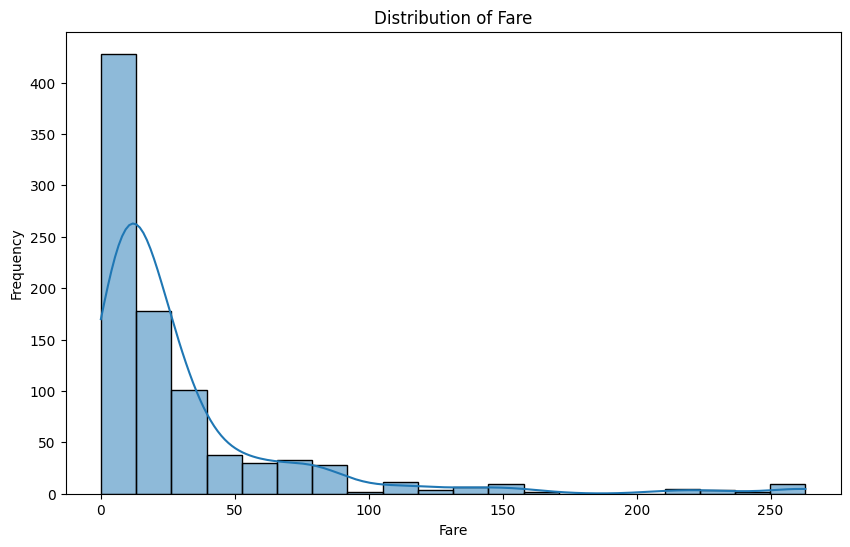

In [ ]:
# set the fare price to 263 for PassengerIds 259, 738, and 680
df.loc[df['PassengerId'].isin([259, 738, 680]), 'Fare'] = 263

# verifying the changes
print("Updated DataFrame with Fare values changed:")
print(df[df['PassengerId'].isin([259, 738, 680])][['PassengerId', 'Name', 'Fare']])

print(df.describe())

# plot histogram of Fare to verify changes
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


**now we are ready to answer the pre-requisite questions!**

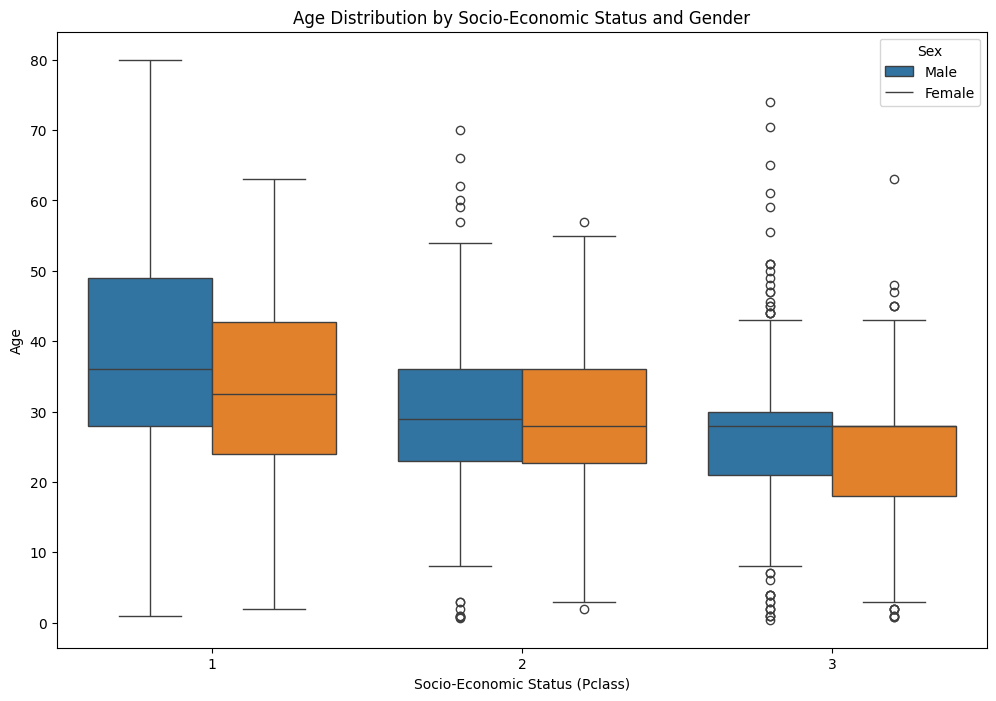

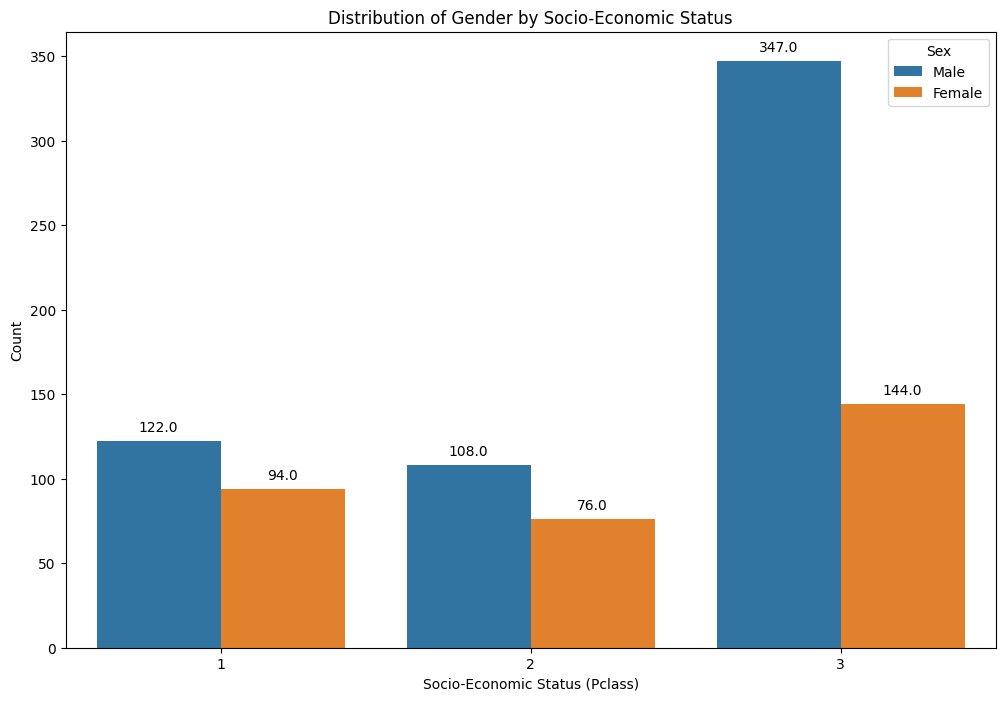

In [ ]:
# A) explore socio-economic status with varying features

# age compared to pclass and gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Socio-Economic Status and Gender')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Age')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

# gender compared to pclass
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Pclass', hue='Sex', data=df)

# adding annotations to each bar to show specific count for easier visualization
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Gender by Socio-Economic Status')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

A) Analyzing the socioeconomic data between age, class, and gender.

In the analysis of the socioeconomic data between age, class, and gender, I had discovered several interesting findings. The first graph shows how 1st class passengers were typically older than the rest, with the male members being the oldest on average as well as having the oldest passenger on board. The second oldest group was the 2nd class passengers with some outliers being children and elderly people. The disparity between male and females wasn't as drastic as the distribution of 2nd class passengers. Last but not least, by far the youngest on average were the 3rd class passengers. The majority of the members could be seen around the mid-20s to mid-30s age group; in addition, many of the outliers were children and a diverse spread of males above the age of 46.

To a certain extent, this makes sense because the wealthy class tend to a better chance to live longer with their extended resources compared to the lower classes, with the men dominating class system in this patriarch society.

I was curious about the number of outliers, especially within the 3rd class passengers and decided to graph it out. To no surprise, the majority of the passengers were of 3rd class, with the men leading the charge with a steep 347 number. This is so much larger than the rest, in fact, that adding all the members of the 1st and 2nd class (which sums to 400 passengers) only trumps it by 53 members.

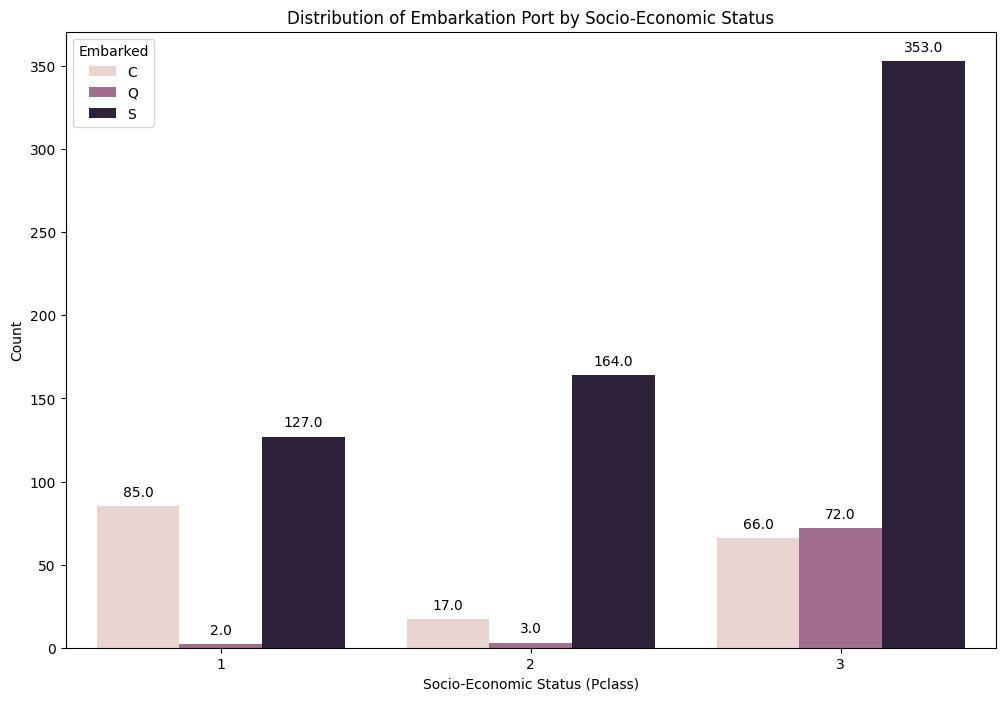

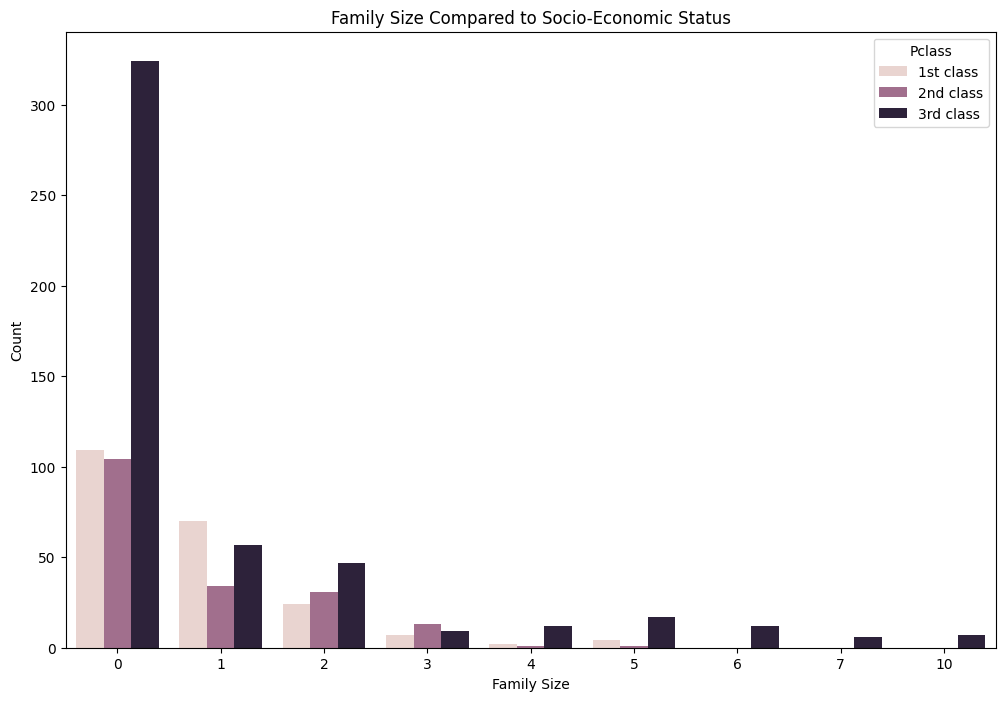

In [ ]:
# embarkation location compared to pclass
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Pclass', hue='Embarked', data=df)

# adding annotations above each bar to show specific count
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Embarkation Port by Socio-Economic Status')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Count')
plt.legend(title='Embarked', labels=['C', 'Q', 'S'])
plt.show()

# family size compared to pclass
plt.figure(figsize=(12, 8))
sns.countplot(x='family_size', hue='Pclass', data=df)
plt.title('Family Size Compared to Socio-Economic Status')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right', labels=['1st class', '2nd class', '3rd class'])
plt.show()

Key:
C = Cherbourg = 1,
Q = Queenstown = 2,
S = Southampton = 3

Where passengers embark from was also an interesting point of discussion for me. After graphing it out, I could see that the majority of the passengers embarked from Southampton from all classes. Additionally, the most amount of people who embarked from Cherbourg were 1st class passengers-- but there was plenty from the 3rd class passengers as well. Cherbourg also holds the highest number of 1st class passengers which I can assume that it is a town with higher class citizens. Queenstown seemed to be moderately unpopular as 5 total passengers from the 1st and 2nd class passengers combined embarked from there while a whopping 72 passengers from the 3rd class embarked from Southampton. From these observations, I can assume that Queenstown is a lower class town with a few higher class members (or at least members of society who can afford the higher class ticket prices). That being said, it's difficult to come to conclusive statements with this information.

I also wanted to analyze the family size of each passenger class. For each class, the trend is that the majority of them have 0 family members along for them in the ride and continues downwards as family size increases. 3rd class passengers tend to have more variety in the number of family members: the highest of 10 family members belongs to the 3rd class.

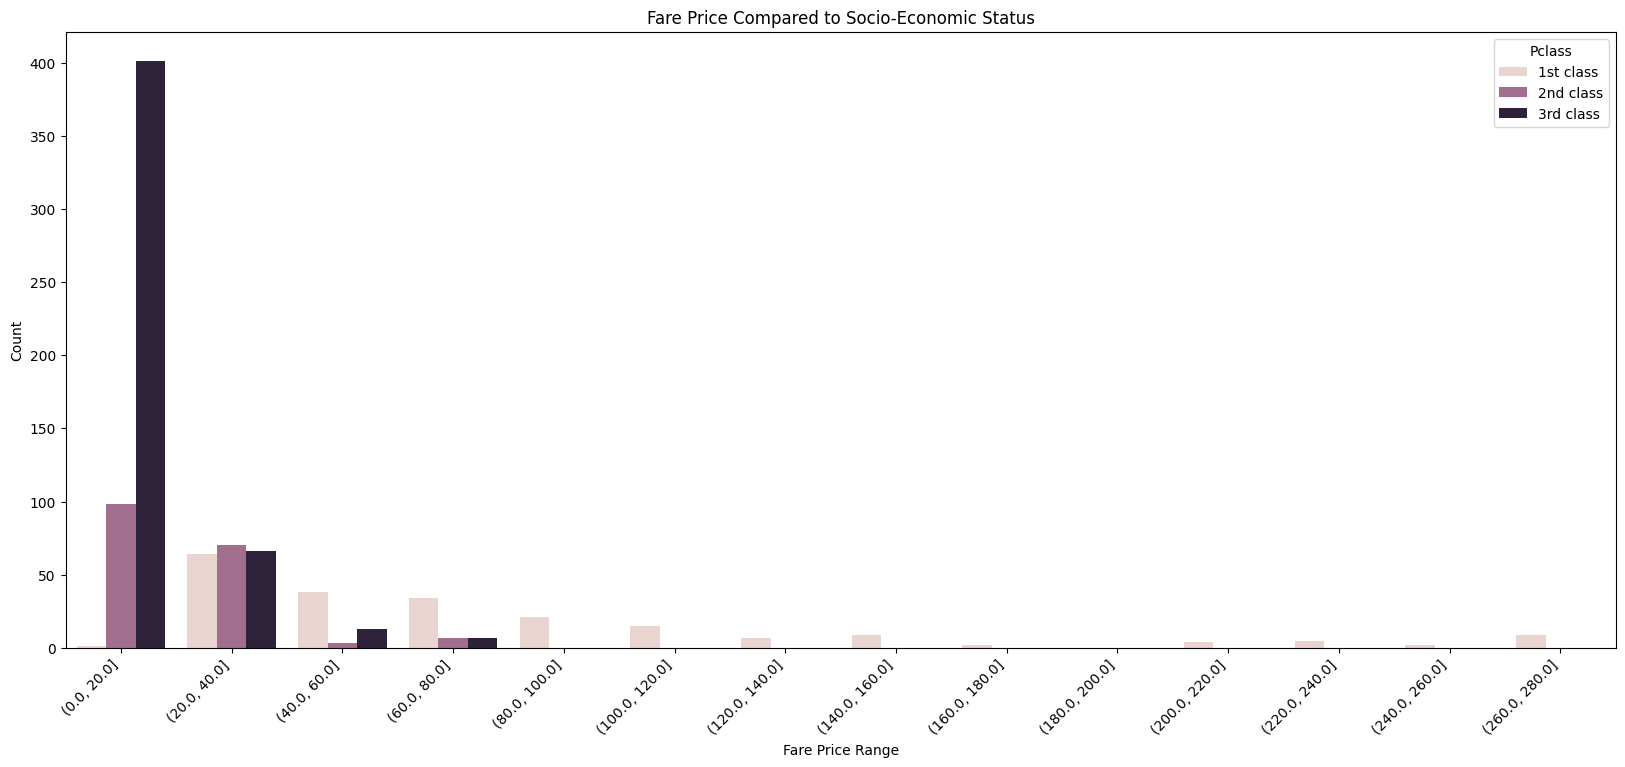

In [ ]:
# define fare price bins
fare_bins = np.arange(0, df['Fare'].max() + 20, 20)

# create a new column 'fare_range' to categorize fare prices into bins
df['fare_range'] = pd.cut(df['Fare'], bins=fare_bins)

# plot fare price compared to Pclass using fare ranges
plt.figure(figsize=(20, 8))
sns.countplot(x='fare_range', hue='Pclass', data=df)
plt.title('Fare Price Compared to Socio-Economic Status')
plt.xlabel('Fare Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pclass', loc='upper right', labels=['1st class', '2nd class', '3rd class'])
plt.show()

The result was obvious: Higher classed passengers paid for more expensive fare prices (although I did notice that 2nd class and 3rd class passengers had similarly priced tickets). Doing a Google search about the price of tickets confirms not only this, but also the sheer amount of money that went into this project. And it wasn't like 3rd class passenger tickets were cheap either. In 1912 (when the Titanic sailed), a 3rd class ticket was `$35`. With inflation, that ticket costed `$1,071`. Whether these prices are in pounds of dollars isn't clear; either way, these prices were extremely high.

This is from this source: https://www.cruisemummy.co.uk/titanic-ticket-prices/

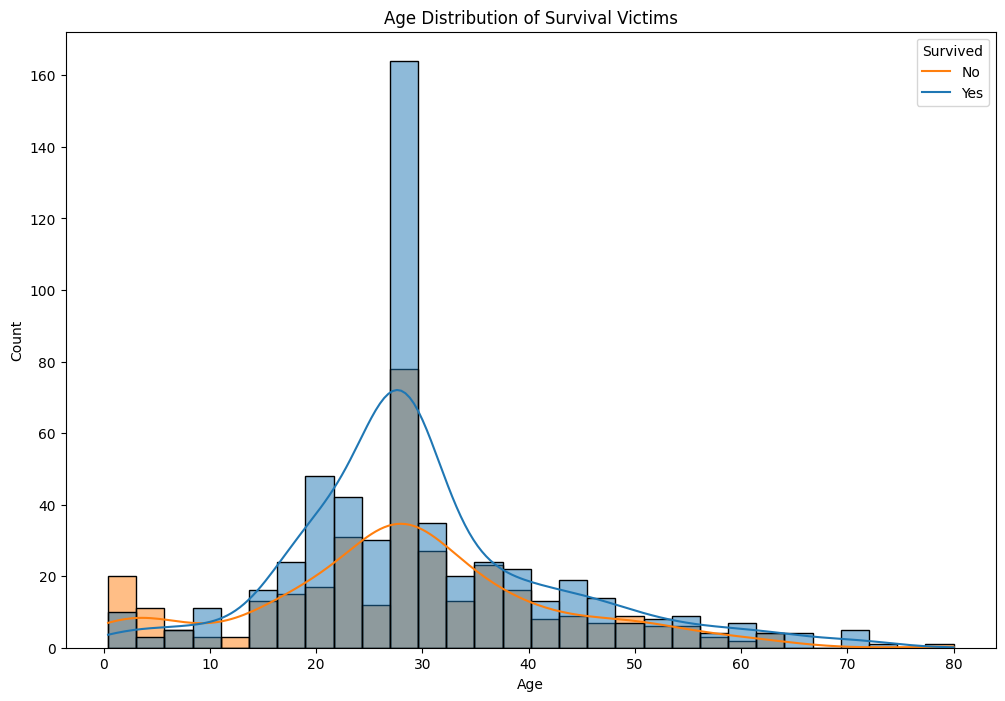

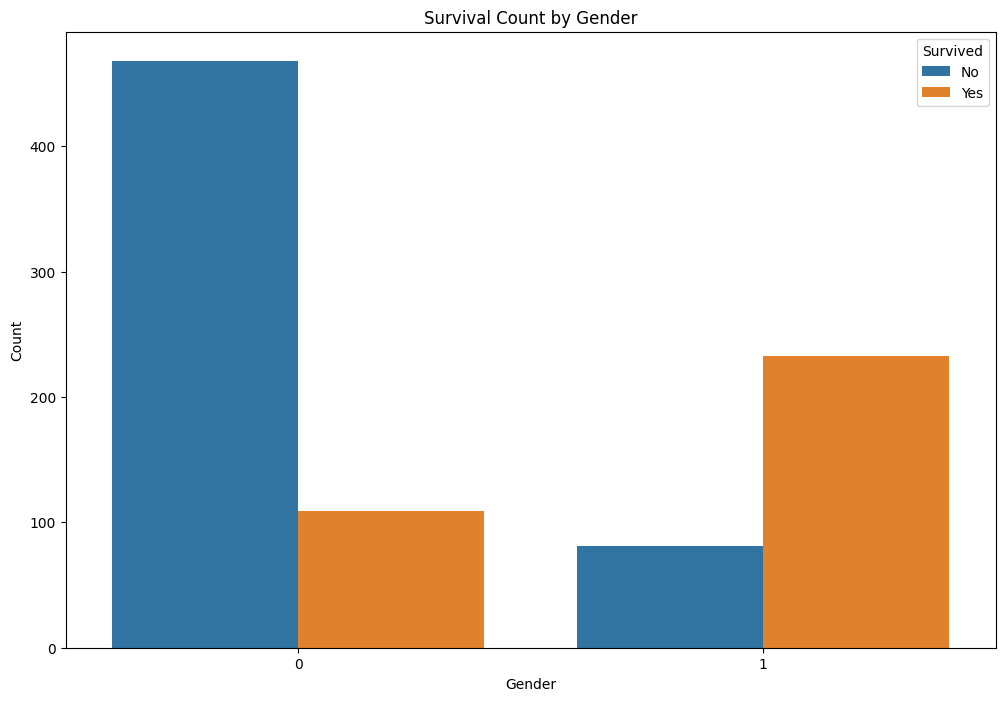

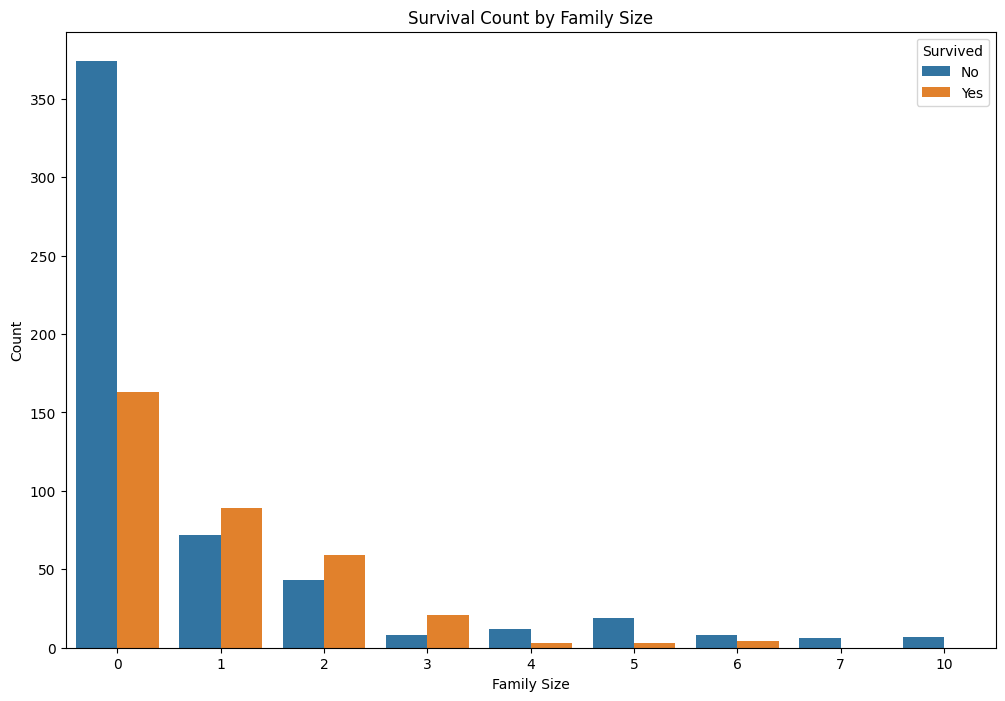

In [ ]:
# B) explore distribution of survival victims

# survival count compared to age
plt.figure(figsize=(12, 8))
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Age Distribution of Survival Victims')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# survival count compared to Gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# survival count compared to family_size
plt.figure(figsize=(12, 8))
sns.countplot(x='family_size', hue='Survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

B) Analysis of Survival Victims in Relation to Various Factors

Secondly, I want to analyze distribution of survival victims in relation to age, gender, socioeconomic status, and family size.

From the first graph, we can see that the average age of victims were between late 20s to early 30s. That also applies to the surviving passengers. This is also because the average age of passenger is around the same age.

In the second graph, significantly more males passed compared to the number of females. This makes sense because saving women and children in times of crisis is something that a lot of people take priority of. Hence, the number of females who was unable to survive is barely less than the number of males who survive.

Finally, the third graph in this section displays the survival count by family size. The majority was by far passengers with 0 family members. However, passengers with at least 1 to 3 family members survived more often. This drops afterwards on family members > 4.

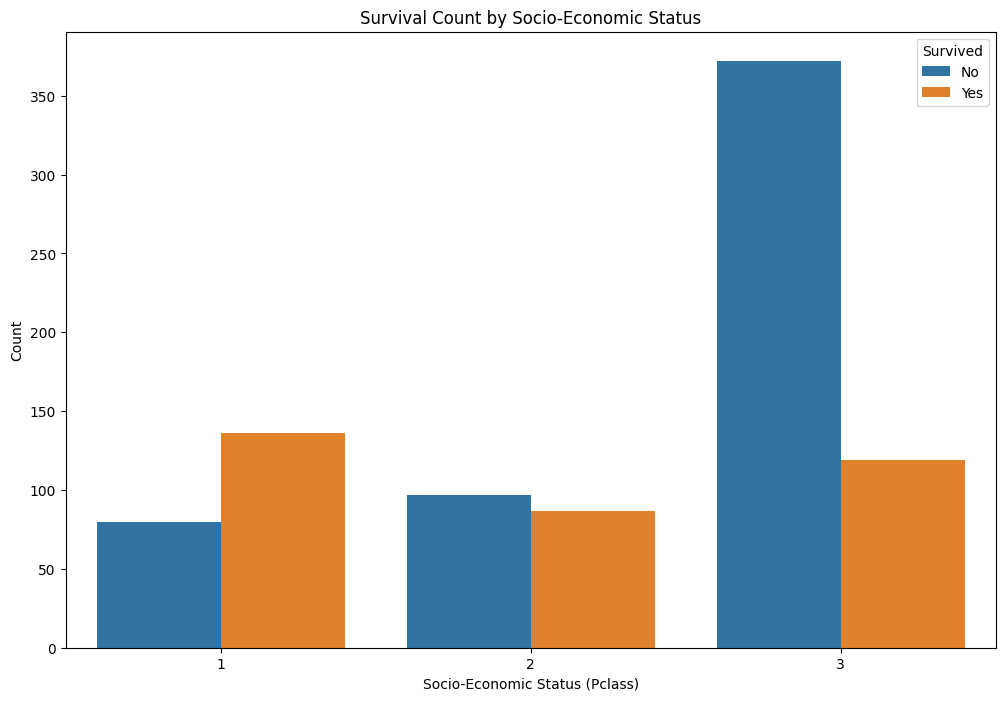

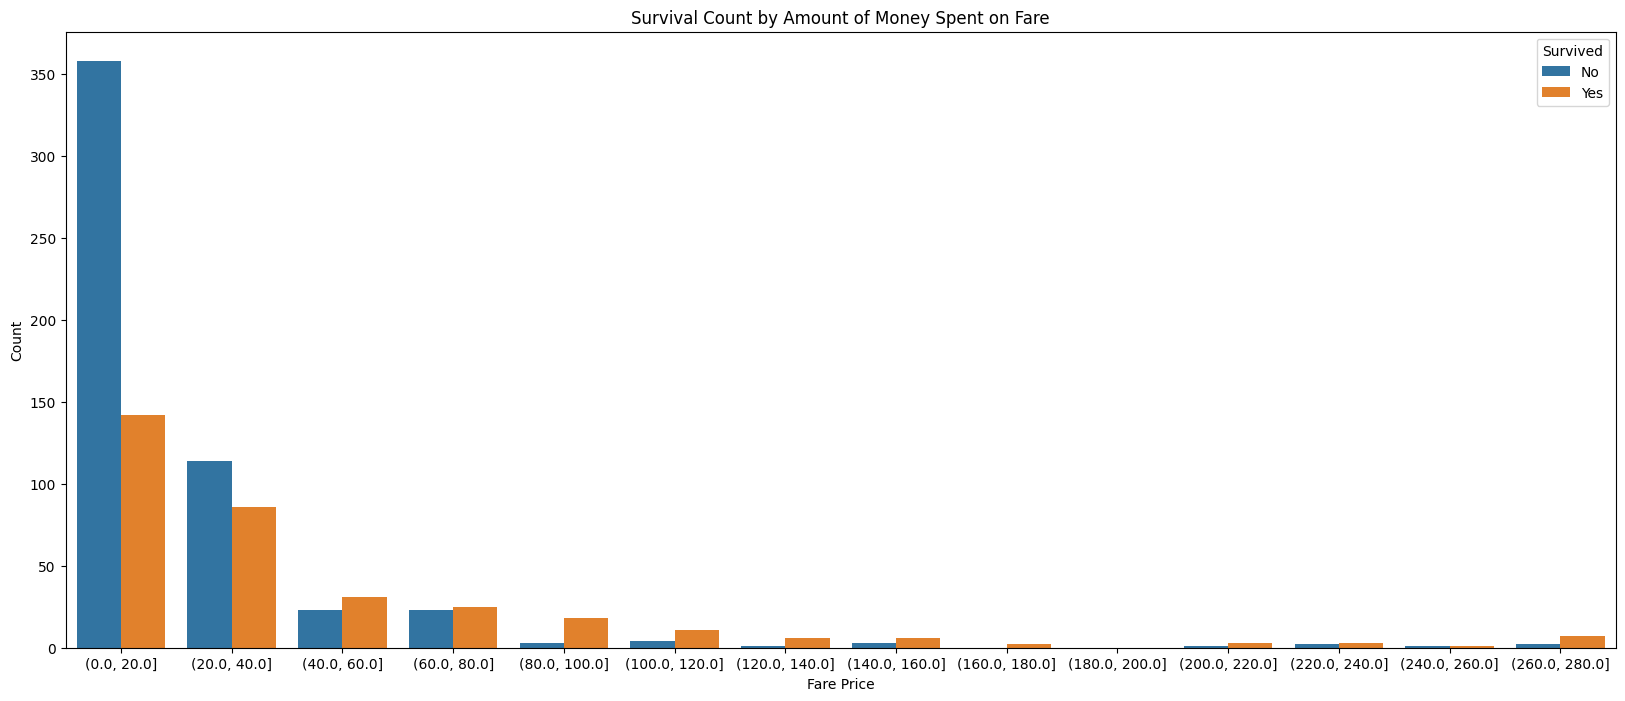

In [ ]:
# survival count compared to pclass
plt.figure(figsize=(12, 8))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Socio-Economic Status')
plt.xlabel('Socio-Economic Status (Pclass)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# survival count compared to fare price spent using the same range used above
plt.figure(figsize=(20, 8))
sns.countplot(x='fare_range', hue='Survived', data=df)
plt.title('Survival Count by Amount of Money Spent on Fare')
plt.xlabel('Fare Price')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

As expected, 1st class passengers survived more than the number of survivals from the lower classes. Significantly more 3rd class passengers passed as well.

It seems that higher class passengers took more priority to escape than the other passengers.

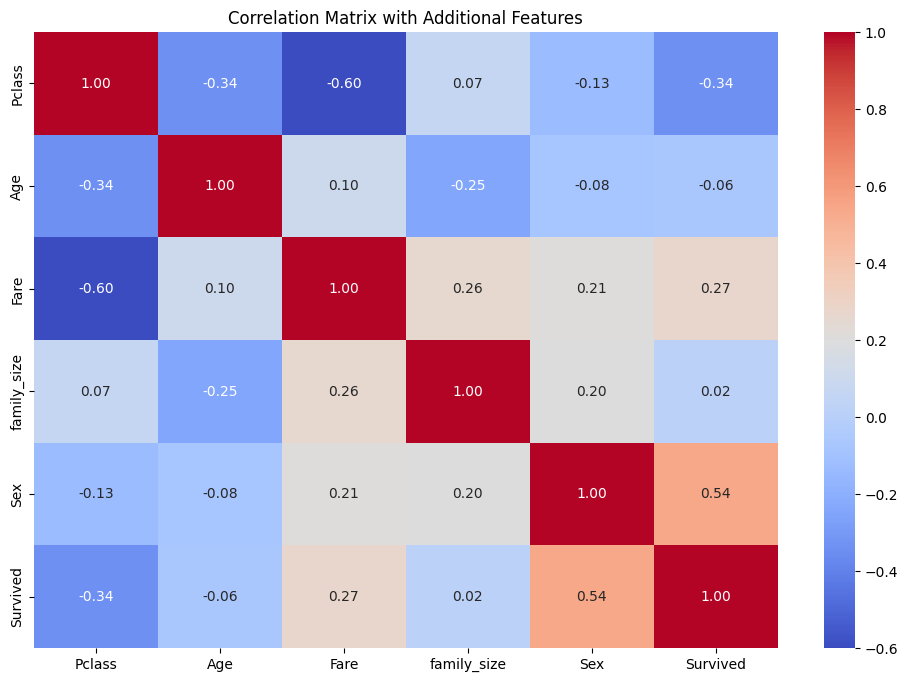

In [ ]:
# correlation analysis

# important features added to the correlation matrix
additional_features = ['Pclass','Age', 'Fare', 'family_size', 'Sex', 'Survived']
correlation_matrix_with_additional = df[additional_features].corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_additional, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Additional Features')
plt.show()

I find that the most important factors are Pclass, Age, Fare, family_size, Sex, and Survived.

Looking at the correlation analysis heatmap, the Pclass part works inverse to what you think since the higher number represents a lower class. Thus, any negative values means a higher correlation rather than the opposite. Because of this, it is safe to say that a "higher" passenger class typically means a higher age, more expensive fare price, and higher rate of survivability. And this is practically confirms what we saw previously.

By far the highest correlation was Sex and Survived. At a steep 0.54, it is clear what we saw earler with the high number of females surviving more than the male population is not wrong.

Age is less conclusive but we can make some inferences based on the data. Age compared to Pclass and family_size is similar, perhaps due to the fact a higher family_size and "higher" passenger class means more children included.

A higher fare price also leads to a higher correlation with survival, based on what we saw previously. If you have more family members, that will mean a higher price as well.

The rest of the factors have already been discussed.

From non-numerical features, I have changed the 'Sex' original string values to be binary values of 0 = male and 1 = female.

I also changed the 'Embarked' values from letters to numbers: C = Cherbourg = 1, Q = Queenstown = 2, and S = Southampton = 3.

Ticket, Name, and Cabin have negligible impact on the data analysis and is only there for passenger identification.

===================================================================================================

Now we start predicting the model. I want to start with preparing the test data's columns to match the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict

# tdf is test_df for test.csv
tdf = pd.read_csv("test.csv")

print(tdf.head())
print("\n============================\n")
print(tdf.describe())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.50000

In [ ]:
# preprocess the data

# mapping string data to numerical data
sex_mapping = {'male': 0, 'female': 1}
tdf['Sex'] = tdf['Sex'].map(sex_mapping)

embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
tdf['Embarked'] = tdf['Embarked'].map(embarked_mapping)

# inputting missing or NaN data
tdf['Age'].fillna(tdf['Age'].median(), inplace=True)
tdf['Fare'].fillna(tdf['Fare'].median(), inplace=True)


# combining "family traits" to a single column
tdf['family_size'] = tdf['SibSp'] + tdf['Parch']
tdf = tdf.drop(['SibSp', 'Parch'], axis=1)

print(tdf.describe())

       PassengerId      Pclass         Sex         Age        Fare  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550    0.363636   29.599282   35.576535   
std     120.810458    0.841838    0.481622   12.703770   55.850103   
min     892.000000    1.000000    0.000000    0.170000    0.000000   
25%     996.250000    1.000000    0.000000   23.000000    7.895800   
50%    1100.500000    3.000000    0.000000   27.000000   14.454200   
75%    1204.750000    3.000000    1.000000   35.750000   31.471875   
max    1309.000000    3.000000    1.000000   76.000000  512.329200   

         Embarked  family_size  
count  418.000000   418.000000  
mean     2.401914     0.839713  
std      0.854496     1.519072  
min      1.000000     0.000000  
25%      2.000000     0.000000  
50%      3.000000     0.000000  
75%      3.000000     1.000000  
max      3.000000    10.000000  


In my decision for choosing which ML models to use, I chose the ones we learned in class and one we briefly mentioned: Logistic Regression, Linear Regression, K Neighbors Classifier, Random Forest Classifier.

Logistic Regression is a binary classification algorithm that is used to predict probability of a binary outcome. For instance, it is used to predict whether an email is a spam or not, or if a patient has a disease or not. It assumes a linear relationship betweent the input variables and the log-odds of the output.

Linear Regression is a supervised learning algorithm used for regression. It is used to predict a continous target variable. It finds the "best-fitting" linear relationship between the input features and target by iteratively minimizing the sum of the squared differences between the observed and predicited values. It is a bit out of place as it calculates a precise value rather than a binary one. Thus, I decided to make a rule: if the value is greater than 0.5, I will consider it that the passenger "survived": they will receive a 1. If the value is anything less, I mark it as 0.

K Neighbors Classifier is a supervised learning algorithm used for classification. It doesn't learn the model explicitly; rather, it memorizes the training instances and makes predicitions based on the similarity of new instances to the training data. In other words, on each new data point, it identifies the k nearest neighbors (data points with the most similar features) from the training set.

Random Forest Classifier is a supervised learning method for classification and regression. It utilizes the concept of decision trees: it builds multiple trees and merges their prediction to improve accuracy and reduce overfitting.

In [ ]:
# define key features and target variable
features = ['Pclass', 'Sex', 'Age', 'family_size', 'Fare']
X_train = df[features]
y_train = df['Survived']

X_test = tdf[features]

# load, train, and predict with Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# load, train, and predict with Linear Regression model
# Linear Regression predicts with more specific values to their decimal place. I didn't want that, so I decided
# to make it so that if your "survival" is more than 0.5, you survived.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_predictions = [1 if x > 0.5 else 0 for x in linear_predictions]

# load, train, and predict with K Neighbors Classifier model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# load, train, and predict with Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# printing the predictions for visibility
print("Logistic Regression predictions:", logistic_predictions)
print("Linear Regression predictions:", linear_predictions)
print("KNeighbors Classification predictions:", knn_predictions)
print("Random Forest Classification predictions:", rf_predictions)

Logistic Regression predictions: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Linear Regression predictions: [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [ ]:
# i took the sample submission i found on piazza that a TA sent.
# because the actual "Survived" metric is locked since it is a Kaggle Competition, i took this data
# and assumed it was the "true" Survived data of the test.csv

true_data = pd.read_csv("idkiftrue_submission.csv")
true_survival = true_data['Survived']

# evaluating models
def evaluate_model(predictions, true_survival, model_name):
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(true_survival, predictions))
    print("Precision:", precision_score(true_survival, predictions))
    print("Recall:", recall_score(true_survival, predictions))
    print("F1 Score:", f1_score(true_survival, predictions), "\n")

print("Evaluation on True Data:")
evaluate_model(logistic_predictions, true_survival, "Logistic Regression")
evaluate_model(linear_predictions, true_survival, "Linear Regression")
evaluate_model(knn_predictions, true_survival, "K Neighbors Classifier")
evaluate_model(rf_predictions, true_survival, "Random Forest Classifier")

Evaluation on True Data:
Metrics for Logistic Regression:
Accuracy: 0.9354066985645934
Precision: 0.8805031446540881
Recall: 0.9459459459459459
F1 Score: 0.9120521172638437 

Metrics for Linear Regression:
Accuracy: 0.9665071770334929
Precision: 0.9466666666666667
Recall: 0.9594594594594594
F1 Score: 0.9530201342281879 

Metrics for K Neighbors Classifier:
Accuracy: 0.6483253588516746
Precision: 0.5029940119760479
Recall: 0.5675675675675675
F1 Score: 0.5333333333333332 

Metrics for Random Forest Classifier:
Accuracy: 0.8349282296650717
Precision: 0.7548387096774194
Recall: 0.7905405405405406
F1 Score: 0.7722772277227724 



Quite interesting results! Between the 3 models, it seems that Logistic Regression and Linear Regression performed significantly better than the K Neighbors Classifier based on the scoring. Among the top 2, the linear regression model performed slightly better in terms of all measurements.

For why K Neighbords Classifer performed worse compared to the top 2, there could be a number of factors. Perhaps the number of features (5) had an impact in this. As the number of features increases, the distance between the data points in the feature space also increases which can lead to sparsity and higher computational complexity in calculating distances between data points. In addition to that, with a higher number of features, KNN can become more prone to overfitting. As higher-dimensional feature spacess, clearly defining an appropriate decision boundary also becomes increasingly more challenging. With more features, the boundaries between classes may become more complex and less distinguishable. This could ultimately lead to suboptimal performance.

For Random Forest, it could be that the data is not properly regularized/normalized. This could lead to overfitting since it could learn the noise of the data rather than the actual components.

This first run made me motivated to try a smaller feature size group and only keeping the members that have the highest correlation point that we saw from the heatmap.

In [ ]:
# define NEW key features and target variable
features = ['Pclass', 'Sex', 'Fare', 'Age']
X_train = df[features]
y_train = df['Survived']

X_test = tdf[features]

# load, train, and predict with Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# load, train, and predict with Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_predictions = [1 if x > 0.5 else 0 for x in linear_predictions]

# load, train, and predict with K Neighbors Classifier model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# load, train, and predict with Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# printing the predictions for visibility
print("Logistic Regression predictions:", logistic_predictions)
print("Linear Regression predictions:", linear_predictions)
print("KNeighbors Classification predictions:", knn_predictions)
print("Random Forest Classification predictions:", rf_predictions)

Logistic Regression predictions: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Linear Regression predictions: [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [ ]:
print("Evaluation on True Data:")
evaluate_model(logistic_predictions, true_survival, "Logistic Regression")
evaluate_model(linear_predictions, true_survival, "Linear Regression")
evaluate_model(knn_predictions, true_survival, "K Neighbors Classifier")
evaluate_model(rf_predictions, true_survival, "Random Forest Classifier")

Evaluation on True Data:
Metrics for Logistic Regression:
Accuracy: 0.9234449760765551
Precision: 0.8625
Recall: 0.9324324324324325
F1 Score: 0.8961038961038962 

Metrics for Linear Regression:
Accuracy: 0.9641148325358851
Precision: 0.934640522875817
Recall: 0.9662162162162162
F1 Score: 0.9501661129568106 

Metrics for K Neighbors Classifier:
Accuracy: 0.638755980861244
Precision: 0.49122807017543857
Recall: 0.5675675675675675
F1 Score: 0.5266457680250783 

Metrics for Random Forest Classifier:
Accuracy: 0.8397129186602871
Precision: 0.7682119205298014
Recall: 0.7837837837837838
F1 Score: 0.7759197324414717 



Google Colab has this weird issue where if you run this model on different days, the values change drastically. When I had written the paragraph below, that was the case. However, now, it seems to be different. Please excuse the work if there are any inconsistencies.

With the new and smaller feature group, we can clearly see an overall higher evaluation matrix scores across the board. There is especially a higher increase for the KNN model, which proves my assumption-- to a certain extend-- had some validity. On the other hand, Logistic Regression took the cake over the Linear Regression model by having the higher scores from accuracy to F1 score.

In [ ]:
# cross validation set

# redefine features
features = ['Pclass', 'Sex', 'Age', 'family_size', 'Fare']

# split the original data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.4, random_state=42)

# logistic regression
logistic_model.fit(X_train, y_train)
# eval
logistic_regression_predictions = logistic_model.predict(X_test)
accuracy_log = accuracy_score(y_test, logistic_regression_predictions)
precision_log = precision_score(y_test, logistic_regression_predictions)
recall_log = recall_score(y_test, logistic_regression_predictions)
f1_log = f1_score(y_test, logistic_regression_predictions)

# linear regression
linear_model.fit(X_train, y_train)
# eval
linear_regression_predictions = linear_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, linear_regression_predictions.round())
precision_lr = precision_score(y_test, linear_regression_predictions.round())
recall_lr = recall_score(y_test, linear_regression_predictions.round())
f1_lr = f1_score(y_test, linear_regression_predictions.round())

# knn
knn_model.fit(X_train, y_train)
# eval
knn_predictions = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_predictions)
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)

# random forest
rf_model.fit(X_train, y_train)
# eval
rf_predictions = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)

print("Logistic Regression - Accuracy:", accuracy_log)
print("Logistic Regression - Precision:", precision_log)
print("Logistic Regression - Recall:", recall_log)
print("Logistic Regression - F1 Score:", f1_log)

print("Linear Regression - Accuracy:", accuracy_lr)
print("Linear Regression - Precision:", precision_lr)
print("Linear Regression - Recall:", recall_lr)
print("Linear Regression - F1 Score:", f1_lr)

print("KNN - Accuracy:", accuracy_knn)
print("KNN - Precision:", precision_knn)
print("KNN - Recall:", recall_knn)
print("KNN - F1 Score:", f1_knn)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)


Logistic Regression - Accuracy: 0.7927170868347339
Logistic Regression - Precision: 0.7815126050420168
Logistic Regression - Recall: 0.6595744680851063
Logistic Regression - F1 Score: 0.7153846153846154
Linear Regression - Accuracy: 0.7759103641456583
Linear Regression - Precision: 0.7520661157024794
Linear Regression - Recall: 0.6453900709219859
Linear Regression - F1 Score: 0.6946564885496184
KNN - Accuracy: 0.7002801120448179
KNN - Precision: 0.6370967741935484
KNN - Recall: 0.5602836879432624
KNN - F1 Score: 0.5962264150943396
Random Forest - Accuracy: 0.7927170868347339
Random Forest - Precision: 0.7557251908396947
Random Forest - Recall: 0.7021276595744681
Random Forest - F1 Score: 0.7279411764705883


Looking at the scores, Cross Validation doesn't seem to work. Across the board were lower scores.

Although, I don't think this should be correct but I don't have the time to figure it out. It should the case that these values should be higher.